In [179]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math
df = pd.read_csv("gaza_libraries_2024.csv", encoding='latin-1')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [181]:
print(df.columns)

Index(['library_name', 'library_location', 'date_establishment',
       'date_destruction', 'cultural_headline', 'erasure', 'damage',
       'cultural_source', 'human_headline', 'numbered_loss', 'story',
       'human_source', 'gender', 'obituary', 'contribution', 'caption',
       'obituaty_source'],
      dtype='object')


In [183]:
# Sort safely only if columns exist

if "human_loss" in df.columns and "damage" in df.columns:
    df = df.sort_values(["human_loss", "damage"])

In [185]:
hover_text = []
bubble_size = []

In [187]:
for index, row in df.iterrows():
    hover_text.append((
        'Library: {library_name}<br>'
        'Location: {library_location}<br>'
        'Established: {date_establishment}<br>'
        'Destroyed: {date_destruction}<br>'
        'Headline: {cultural_headline}'
    ).format(
        library_name=row['library_name'],
        library_location=row['library_location'],
        date_establishment=row['date_establishment'],
        date_destruction=row['date_destruction'],
        cultural_headline=row['cultural_headline']
    ))

    try:
        bubble_size.append(math.sqrt(float(row['human_loss'])))
    except:
        bubble_size.append(1)

In [189]:
df['text'] = hover_text
df['size'] = bubble_size
sizeref = 2.*max(df['size'])/(200**2)

In [191]:
# Dictionary with dataframes for each library

library_location = ['Al-Rimal', 'Beit Hanoun', 'Beit Lahia', 'Khan Younis', 'Gaza', 'Rafah', 'Sheikh Radwan', 'West Bank']

# Use the location name as the key and filter rows based on library_location

library_dfs = {
    location: df.query("library_location == @location")
    for location in library_location
}

In [193]:
# Create figure

fig = go.Figure()

for library_location, location in library_dfs.items():
    fig.add_trace(go.Scatter(
        x=location['date_establishment'], y=location['date_destruction'],
        name=library_location, text=location['text'],
        ))

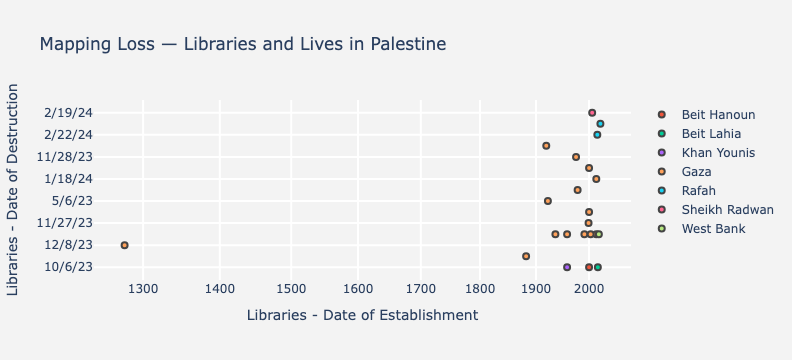

In [195]:
# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title=dict(text='Mapping Loss — Libraries and Lives in Palestine'),
    xaxis=dict(
        title=dict(text='Libraries - Date of Establishment'),
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title=dict(text='Libraries - Date of Destruction'),
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

In [197]:
print(df.columns)

Index(['library_name', 'library_location', 'date_establishment',
       'date_destruction', 'cultural_headline', 'erasure', 'damage',
       'cultural_source', 'human_headline', 'numbered_loss', 'story',
       'human_source', 'gender', 'obituary', 'contribution', 'caption',
       'obituaty_source', 'text', 'size'],
      dtype='object')


In [229]:
hover_text = []
bubble_size = []

for index, row in df.iterrows():
    hover_text.append((
        'Martyr: {obituary}<br>'
        'Contributed as an: {contribution}<br>'
        'Described as: {caption}<br>'
        'Headline: {human_headline}<br>'
        'Human loss: {story}<br>'
        'Gender: {gender}<br>'
        'Loss in nunbers: {numbered_loss}'
    ).format(
        obituary=row['obituary'],
        contribution=row['contribution'],
        caption=row['caption'],
        human_headline=row['human_headline'],
        story=row['story'],
        gender=row['gender'],
        numbered_loss=row['numbered_loss']
    ))

    try:
        bubble_size.append(math.sqrt(float(row['human_loss'])))
    except:
        bubble_size.append(1)

In [231]:
df['text'] = hover_text
df['size'] = bubble_size
sizeref = 2.*max(df['size'])/(200**2)

In [243]:
# Dictionary with dataframes for each contribution

contribution = ['Artist', 'Athelete', 'Journalist', ' Librarian', 'Musician', 'Playwright', 'Student', 'Teacher', 'Writer']

# Use the location name as the key and filter rows based on the contribution

library_dfs = {
    caption: df.query("caption == @caption")
    for caption in contribution
}

In [245]:
fig = go.Figure()

for caption, sub_df in library_dfs.items():
    fig.add_trace(go.Scatter(
        x=['contribution'],  # or any appropriate x-axis field
        y=['gender'],      # or whatever field you want on y-axis
        name=caption,
        text=df['text'],       # hover text, optional
        mode='markers'             # optionally use 'lines+markers'
    ))


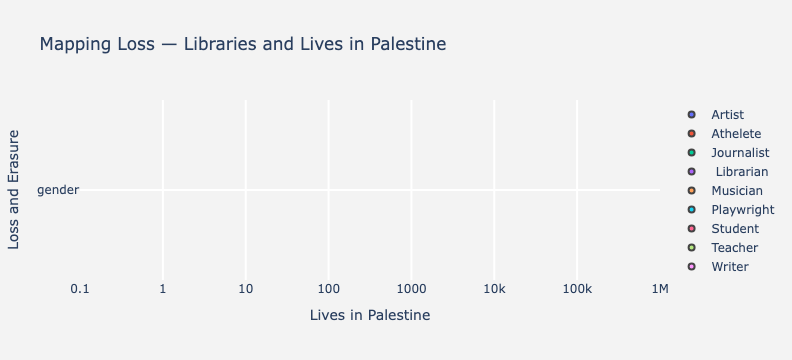

In [247]:
# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title=dict(text='Mapping Loss — Libraries and Lives in Palestine'),
    xaxis=dict(
        title=dict(text='Lives in Palestine'),
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title=dict(text='Loss and Erasure'),
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()